# Linear Mixed Models

In [26]:
library(nlme)
library(ggplot2)
library(gridExtra)
library(dplyr)
library(caret)

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          4.1                         
year           2017                        
month          06                          
day            30                          
svn rev        72865                       
language       R                           
version.string R version 3.4.1 (2017-06-30)
nickname       Single Candle               

In [27]:
# Reading the individual abundance file
data<-read.csv("LME_akkermansia.csv",check.names=FALSE)
data$Individual = as.factor(data$Individual)
data

Subject,Abund,Treat,Time,Individual,OTU_name
<fct>,<dbl>,<fct>,<int>,<fct>,<fct>
570.T1,6.862005e-05,Placebo,1,1,Akkermansia
571.T1,9.091736e-05,Placebo,1,2,Akkermansia
572.T1,7.657554e-05,Placebo,1,3,Akkermansia
573.T1,2.382711e-05,Placebo,1,4,Akkermansia
574.T1,9.227362e-05,Placebo,1,5,Akkermansia
575.T1,5.408329e-05,Placebo,1,6,Akkermansia
576.T1,7.546031e-05,Placebo,1,7,Akkermansia
577.T1,7.211018e-05,Placebo,1,8,Akkermansia
578.T1,0.000000e+00,Letrozole,1,9,Akkermansia


In [28]:
# Split the data by bacteria
mylist <- split(data, data$OTU_name)

## Akkermansia

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    4.0    20.5    40.0    40.0    59.5    79.0 

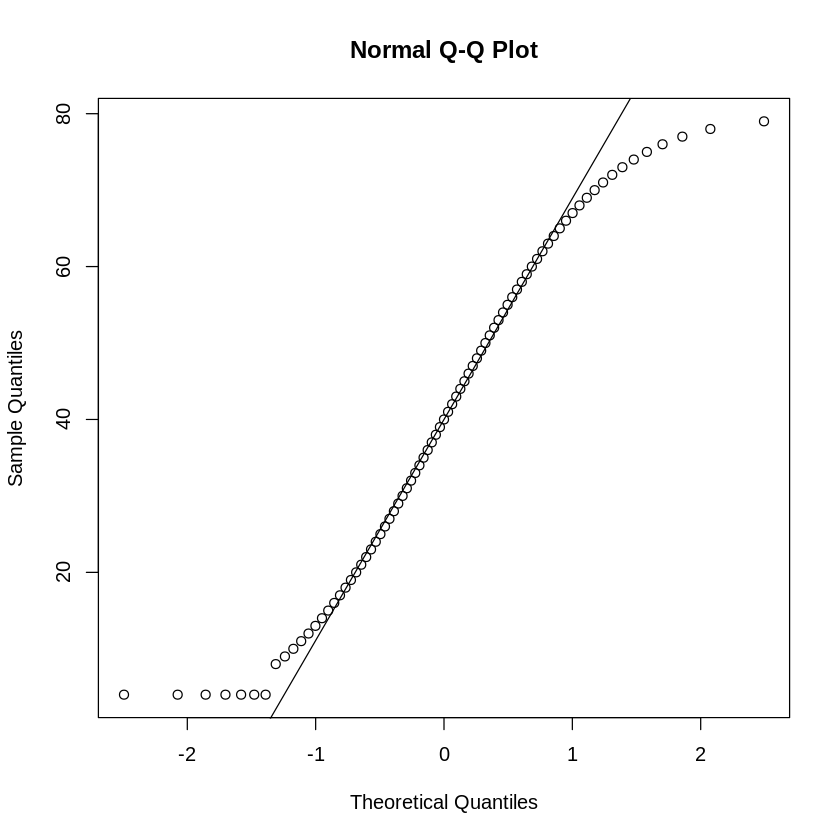

In [29]:
mylist$Akkermansia$Abund = rank(mylist$Akkermansia$Abund)
summary(mylist$Akkermansia$Abund)
qqnorm(mylist$Akkermansia$Abund)
qqline(mylist$Akkermansia$Abund)

Linear mixed-effects model fit by REML
 Data: mylist$Akkermansia 
       AIC      BIC    logLik
  690.6518 709.1917 -337.3259

Random effects:
 Formula: ~1 + I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                StdDev       Corr  
(Intercept)     1.001708e+01 (Intr)
I((Time - 3)^2) 8.752855e-04 0     
Residual        1.779743e+01       

Fixed effects: Abund ~ I((Time - 3)^2) * Treat 
                                 Value Std.Error DF   t-value p-value
(Intercept)                   59.67751  5.696607 61 10.475975  0.0000
I((Time - 3)^2)               -4.58386  1.690419 61 -2.711669  0.0087
TreatPlacebo                 -26.80965  8.014064 14 -3.345325  0.0048
I((Time - 3)^2):TreatPlacebo   3.19993  2.384456 61  1.341995  0.1846
 Correlation: 
                             (Intr) I((Tm-3)^2) TrtPlc
I((Time - 3)^2)              -0.602                   
TreatPlacebo                 -0.711  0.428            
I((Time - 3)^2):TreatP

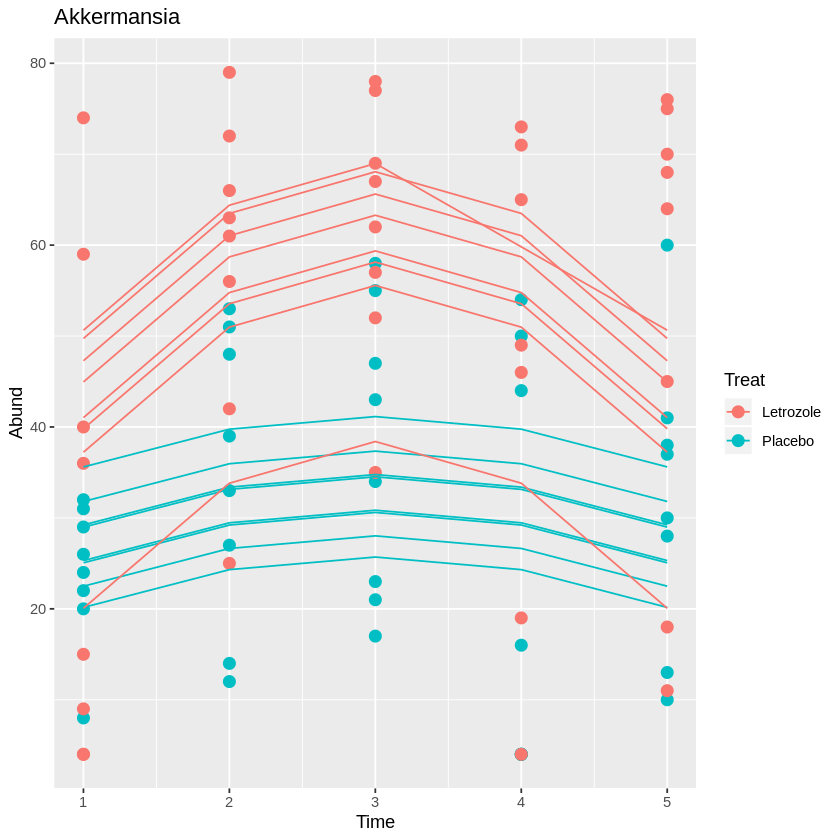

In [31]:
fm_akker <- lme(Abund ~ I((Time-3)^2) * Treat ,data = mylist$Akkermansia, random = ~ 1+I((Time-3)^2)|Individual)
    print(summary(fm_akker))
    newdat <- expand.grid(Treat=unique(mylist$Akkermansia),
                      Time=c(min(mylist$Akkermansia$Time),
                            max(mylist$Akkermansia$Time)))


    p_akker <- ggplot(mylist$Akkermansia, aes(x=Time, y=Abund, colour=Treat)) +
          geom_point(size=3) + ggtitle("Akkermansia") +
          geom_line(aes(y=predict(fm_akker), group=Individual))
    print(p_akker)

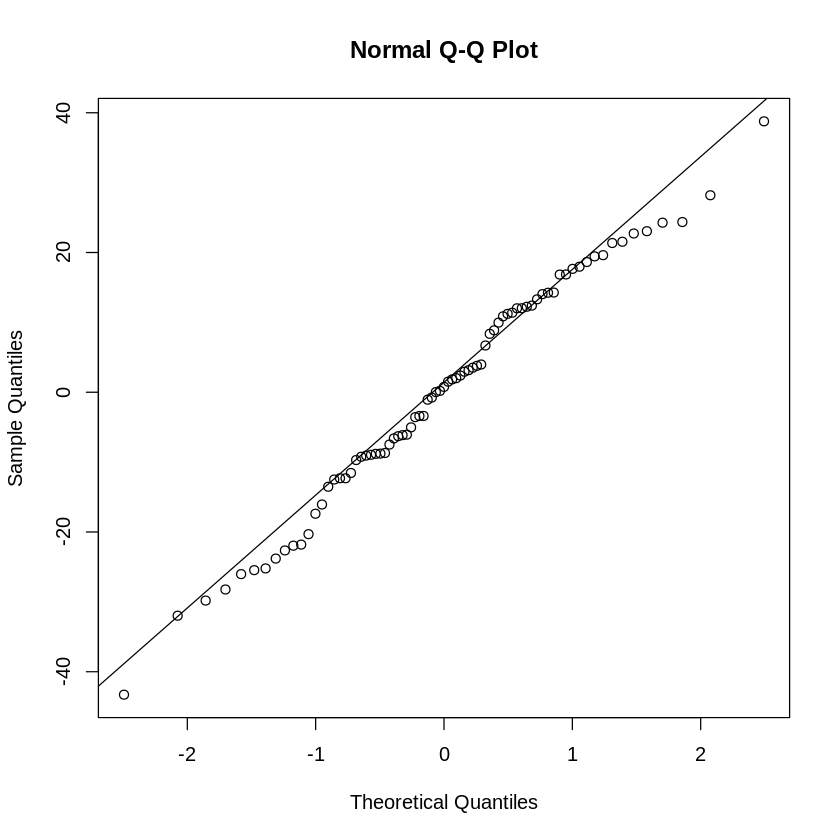

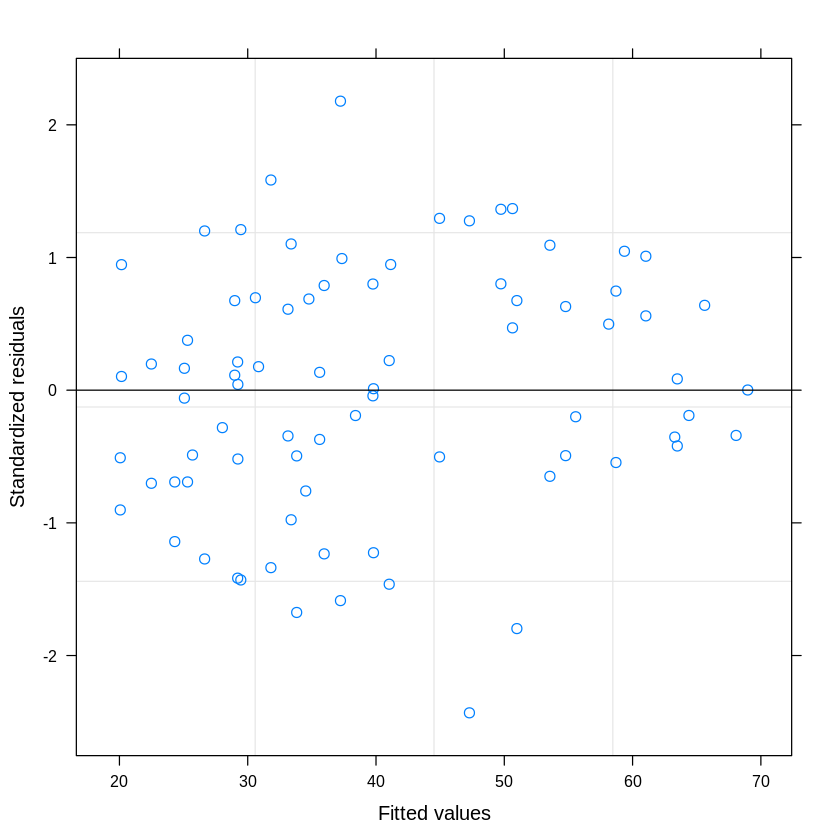

In [23]:
qqnorm(resid(fm_akker))
qqline(resid(fm_akker))
plot(fm_akker)

## Bifidobacterium

Linear mixed-effects model fit by REML
 Data: mylist$Bifidobacterium 
      AIC      BIC    logLik
  710.769 729.3089 -347.3845

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             18.18008 (Intr)
1 | I((Time - 3)^2)TRUE 18.18126 -0.777
Residual                20.19640       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                                Value Std.Error DF   t-value p-value
(Intercept)                  39.79972  6.637969 61  5.995768  0.0000
I((Time - 3)^2)              -0.35411  1.918337 61 -0.184591  0.8542
TreatPlacebo                  3.43599  9.340632 14  0.367855  0.7185
I((Time - 3)^2):TreatPlacebo -0.78875  2.705907 61 -0.291491  0.7717
 Correlation: 
                             (Intr) I((Tm-3)^2) TrtPlc
I((Time - 3)^2)              -0.586                   
TreatPlacebo                 -0.711  0.417            
I((

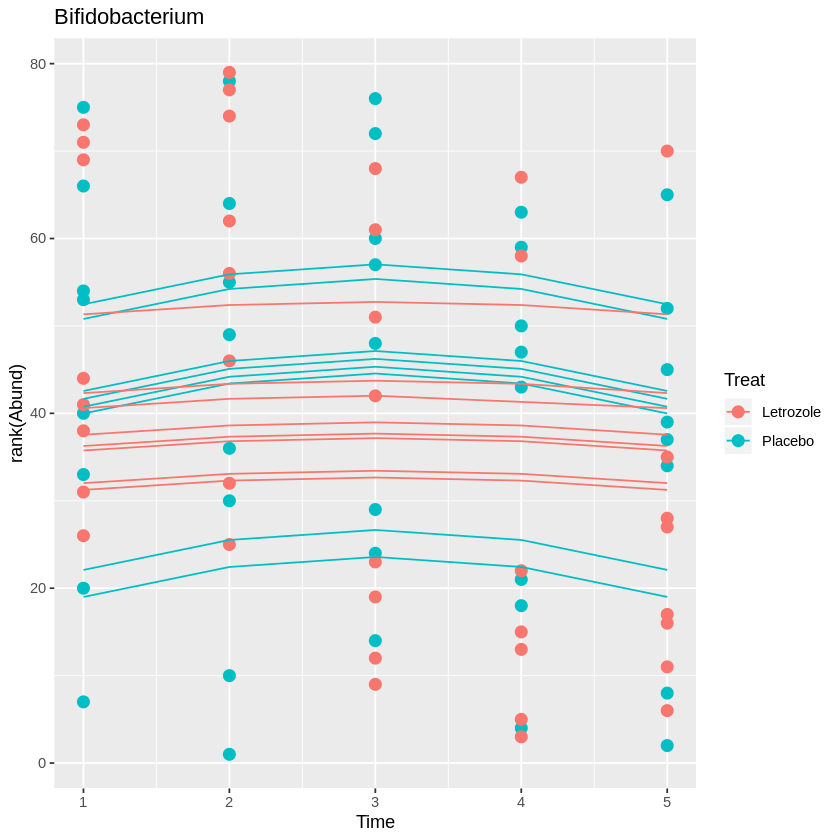

In [7]:
fm_bifido <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Bifidobacterium, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_bifido))
    newdat <- expand.grid(Treat=unique(mylist$Bifidobacterium),
                      Time=c(min(mylist$Bifidobacterium$Time),
                            max(mylist$Bifidobacterium$Time)))


    p_bifido <- ggplot(mylist$Bifidobacterium, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Bifidobacterium") +
          geom_line(aes(y=predict(fm_bifido), group=Individual))
    print(p_bifido)

ERROR: Error in resid(fm_bifido_n): object 'fm_bifido_n' not found


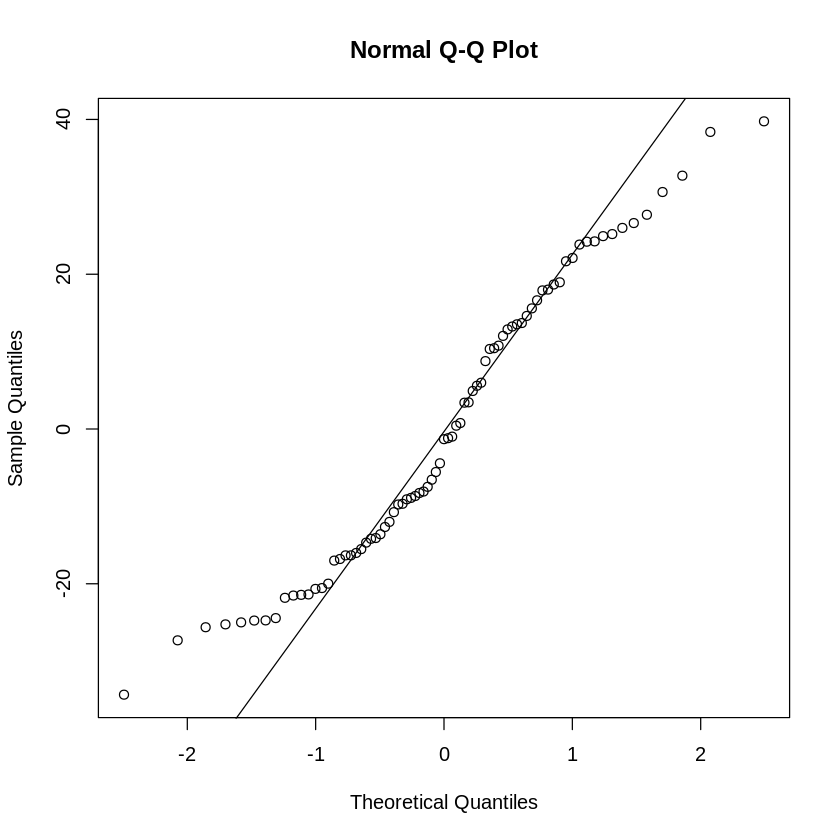

In [8]:
qqnorm(resid(fm_bifido))
qqline(resid(fm_bifido))
qqnorm(resid(fm_bifido_n))
qqline(resid(fm_bifido_n))

## Coprococcus

Linear mixed-effects model fit by REML
 Data: mylist$Coprococcus 
       AIC      BIC    logLik
  717.6534 736.1933 -350.8267

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             15.16800 (Intr)
1 | I((Time - 3)^2)TRUE 15.58304 -0.94 
Residual                22.74364       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                                Value Std.Error DF   t-value p-value
(Intercept)                  43.20270  6.001616 61  7.198512  0.0000
I((Time - 3)^2)              -1.40681  2.159385 61 -0.651488  0.5172
TreatPlacebo                 -2.12056  8.427041 14 -0.251637  0.8050
I((Time - 3)^2):TreatPlacebo  0.66574  3.046548 61  0.218523  0.8278
 Correlation: 
                             (Intr) I((Tm-3)^2) TrtPlc
I((Time - 3)^2)              -0.729                   
TreatPlacebo                 -0.712  0.519            
I((Ti

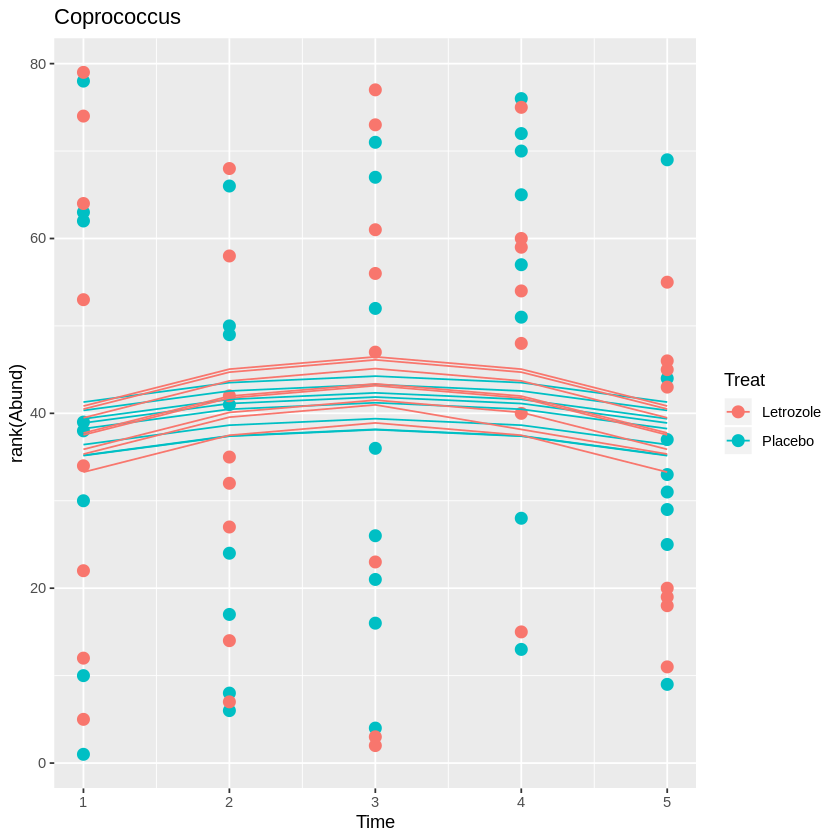

In [9]:
fm_copro <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Coprococcus, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_copro))
    newdat <- expand.grid(Treat=unique(mylist$Coprococcus),
                      Time=c(min(mylist$Coprococcus$Time),
                            max(mylist$Coprococcus$Time)))


    p_copro <- ggplot(mylist$Coprococcus, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Coprococcus") +
          geom_line(aes(y=predict(fm_copro), group=Individual))
    print(p_copro)

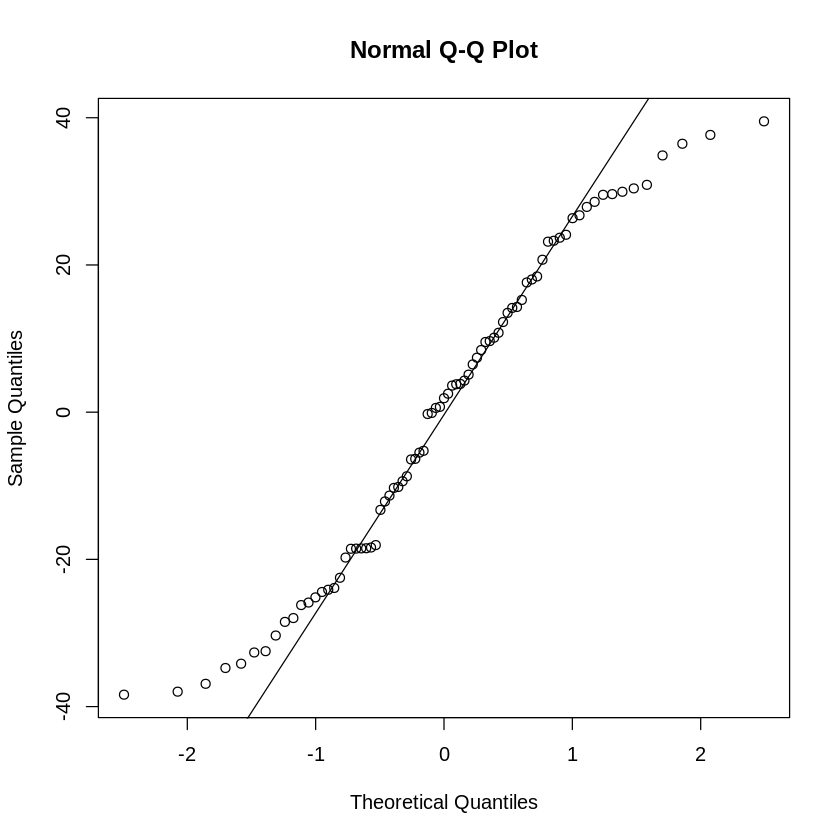

In [10]:
qqnorm(resid(fm_copro))
qqline(resid(fm_copro))

## Allobaculum

Linear mixed-effects model fit by REML
 Data: mylist$Allobaculum 
      AIC      BIC    logLik
  701.015 719.5549 -342.5075

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             17.09060 (Intr)
1 | I((Time - 3)^2)TRUE 17.09060 -0.646
Residual                18.27121       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                                 Value Std.Error DF   t-value p-value
(Intercept)                  31.352502  6.844576 61  4.580635  0.0000
I((Time - 3)^2)               3.098437  1.735687 61  1.785136  0.0792
TreatPlacebo                 12.854641  9.641630 14  1.333243  0.2037
I((Time - 3)^2):TreatPlacebo -3.902008  2.448121 61 -1.593879  0.1161
 Correlation: 
                             (Intr) I((Tm-3)^2) TrtPlc
I((Time - 3)^2)              -0.515                   
TreatPlacebo                 -0.710  0.365            
I(

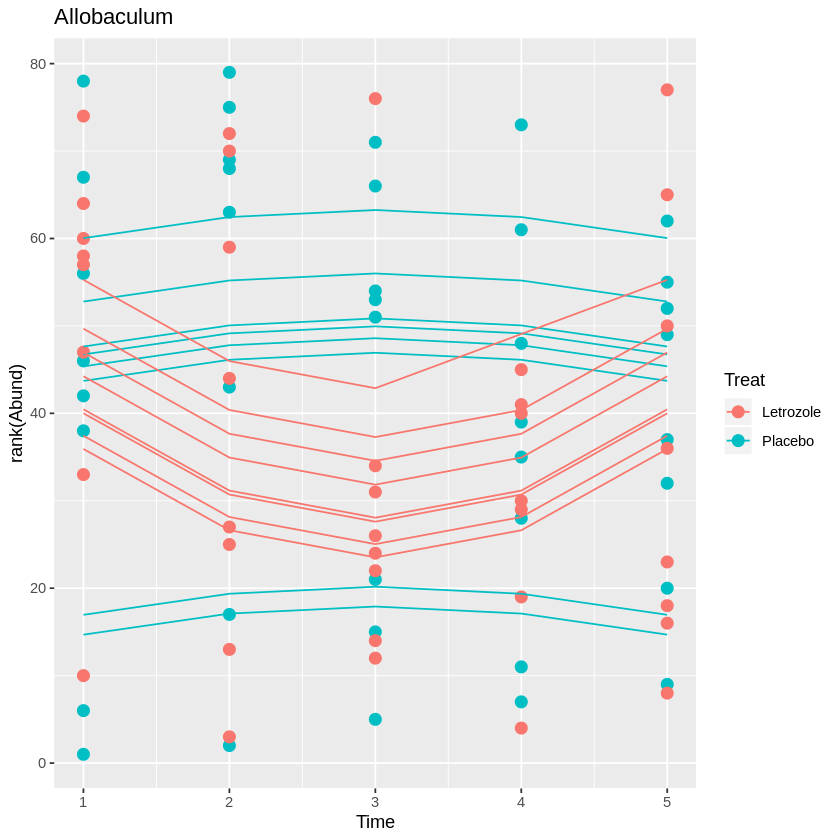

In [11]:
fm_allo <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Allobaculum, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_allo))
    newdat <- expand.grid(Treat=unique(mylist$Allobaculum),
                      Time=c(min(mylist$Allobaculum$Time),
                            max(mylist$Allobaculum$Time)))


    p_allo <- ggplot(mylist$Allobaculum, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Allobaculum") +
          geom_line(aes(y=predict(fm_allo), group=Individual))
    print(p_allo)

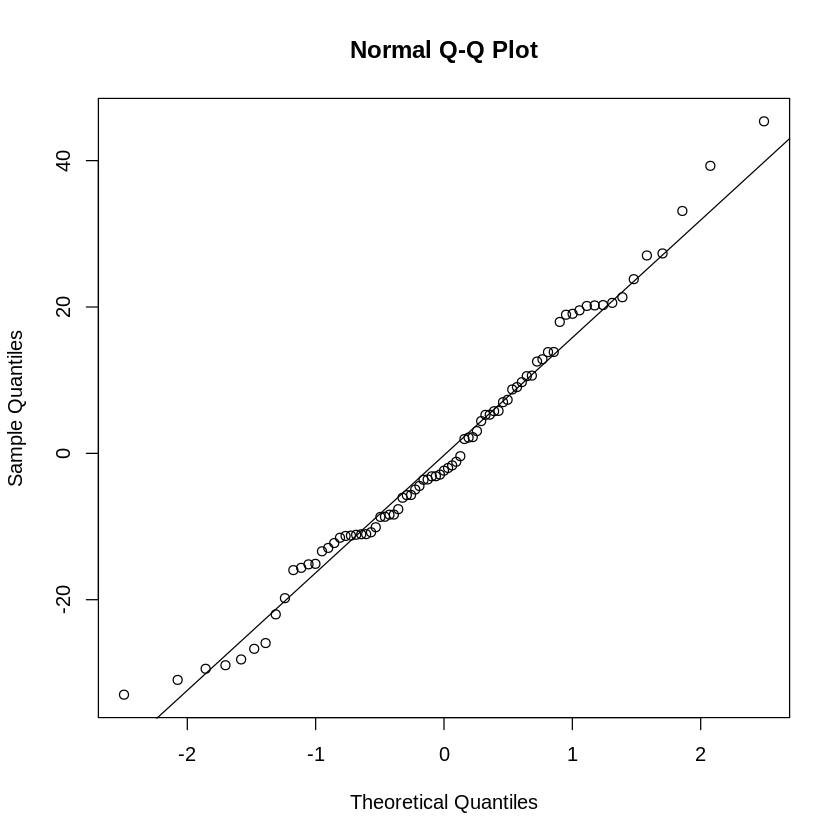

In [12]:
qqnorm(resid(fm_allo))
qqline(resid(fm_allo))


## Ruminococcus

Linear mixed-effects model fit by REML
 Data: mylist$Ruminococcus 
       AIC      BIC    logLik
  702.5895 721.1294 -343.2948

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             17.23313 (Intr)
1 | I((Time - 3)^2)TRUE 17.24091 -0.817
Residual                19.36628       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                                Value Std.Error DF   t-value p-value
(Intercept)                  39.12988  6.097252 61  6.417626  0.0000
I((Time - 3)^2)              -3.25623  1.839389 61 -1.770276  0.0817
TreatPlacebo                 11.04869  8.576377 14  1.288270  0.2185
I((Time - 3)^2):TreatPlacebo  1.66694  2.594617 61  0.642461  0.5230
 Correlation: 
                             (Intr) I((Tm-3)^2) TrtPlc
I((Time - 3)^2)              -0.612                   
TreatPlacebo                 -0.711  0.435            
I((T

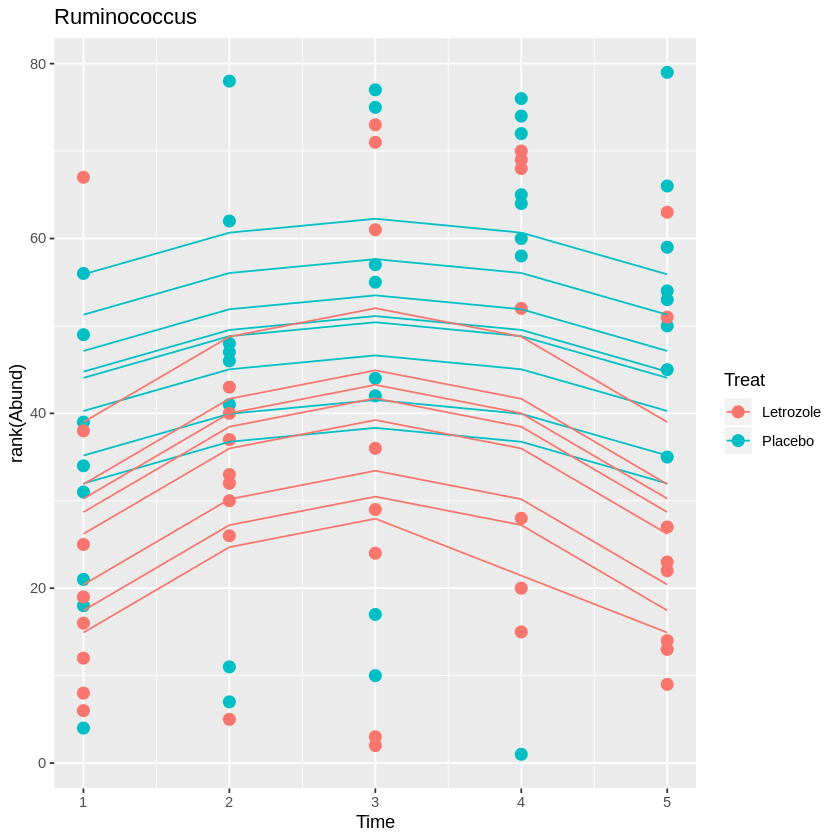

In [13]:
fm_rumino <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Ruminococcus, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_rumino))
    newdat <- expand.grid(Treat=unique(mylist$Ruminococcus),
                      Time=c(min(mylist$Ruminococcus$Time),
                            max(mylist$Ruminococcus$Time)))


    p_rumino <- ggplot(mylist$Ruminococcus, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Ruminococcus") +
          geom_line(aes(y=predict(fm_rumino), group=Individual))
    print(p_rumino)

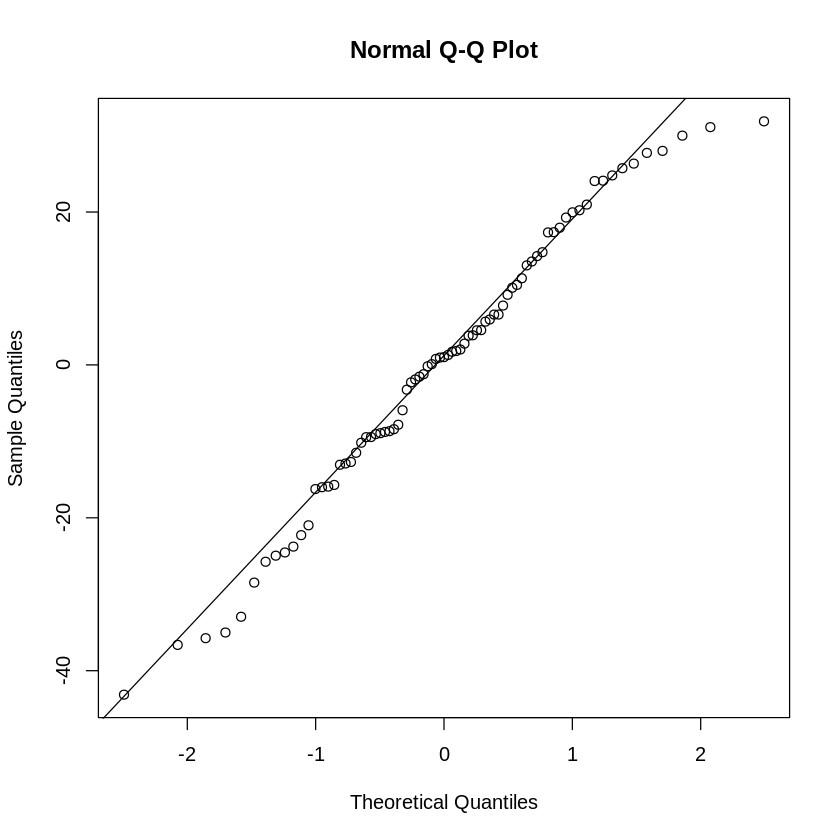

In [14]:
qqnorm(resid(fm_rumino))
qqline(resid(fm_rumino))

## S24-7

Linear mixed-effects model fit by REML
 Data: mylist$`S24-7` 
       AIC      BIC    logLik
  709.7312 728.2711 -346.8656

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev    Corr  
(Intercept)              7.659744 (Intr)
1 | I((Time - 3)^2)TRUE  8.521225 -0.921
Residual                21.845318       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                                 Value Std.Error DF   t-value p-value
(Intercept)                  27.487279  5.592621 61  4.914919  0.0000
I((Time - 3)^2)               5.372442  2.073887 61  2.590518  0.0120
TreatPlacebo                  7.948435  7.850488 14  1.012476  0.3285
I((Time - 3)^2):TreatPlacebo -2.265299  2.926069 61 -0.774178  0.4418
 Correlation: 
                             (Intr) I((Tm-3)^2) TrtPlc
I((Time - 3)^2)              -0.751                   
TreatPlacebo                 -0.712  0.535            


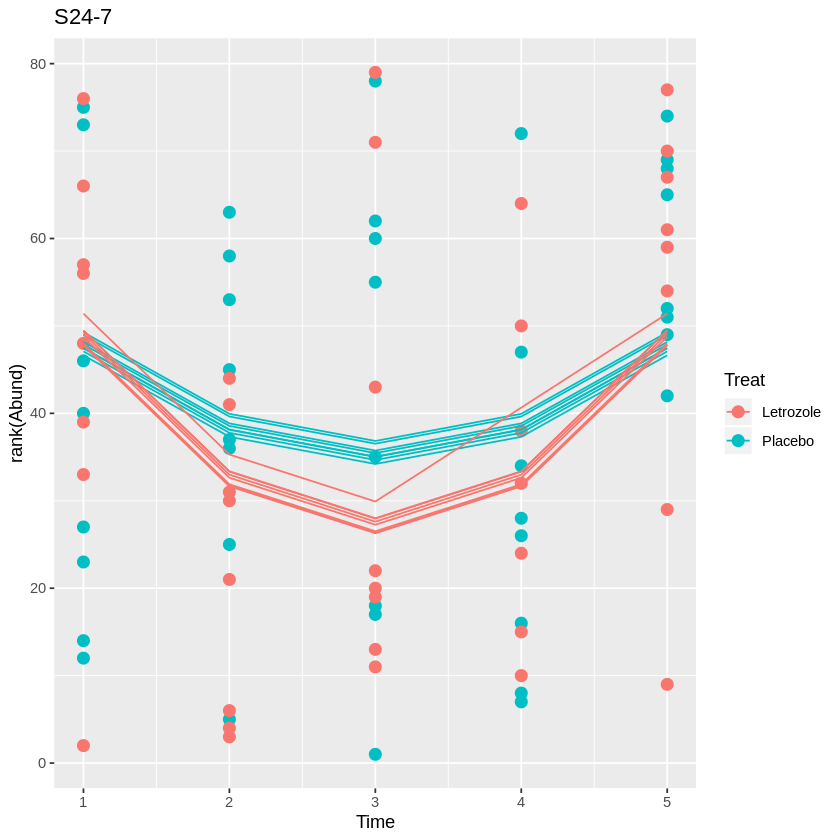

In [15]:
fm_s24 <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$`S24-7`, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_s24))
    newdat <- expand.grid(Treat=unique(mylist$`S24-7`),
                      Time=c(min(mylist$`S24-7`$Time),
                            max(mylist$`S24-7`$Time)))


    p_s24 <- ggplot(mylist$`S24-7`, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("S24-7") +
          geom_line(aes(y=predict(fm_s24), group=Individual))
    print(p_s24)

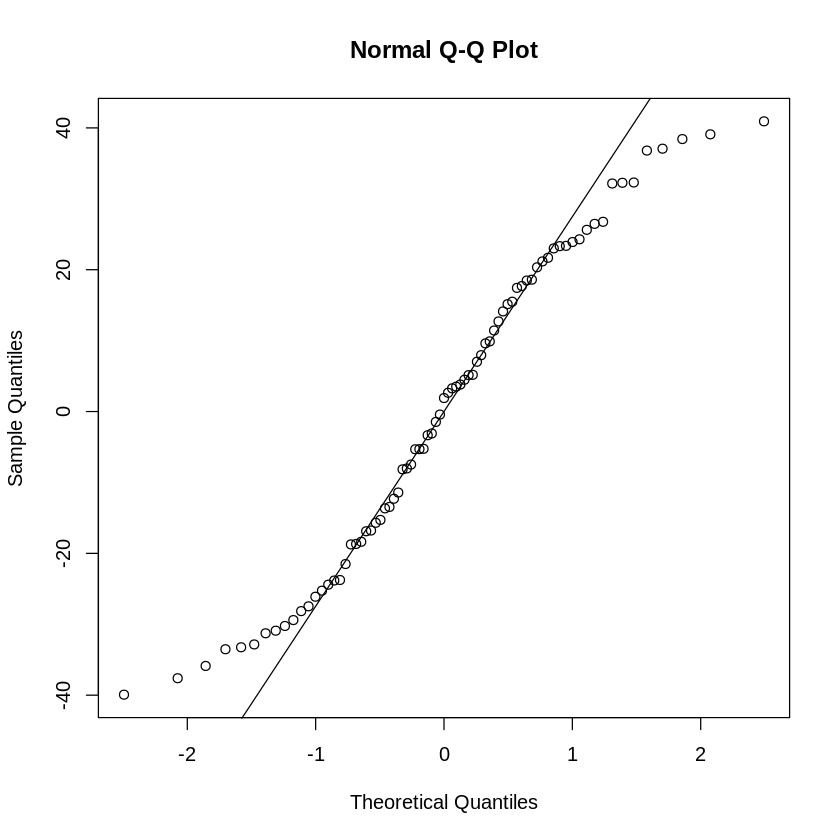

In [23]:
qqnorm(resid(fm_s24))
qqline(resid(fm_s24))

## Erysipelotrichaceae

Linear mixed-effects model fit by REML
 Data: mylist$Erysipelotrichaceae 
       AIC      BIC    logLik
  708.5946 727.1345 -346.2973

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             17.89241 (Intr)
1 | I((Time - 3)^2)TRUE 18.04294 -0.882
Residual                20.64715       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                                 Value Std.Error DF   t-value p-value
(Intercept)                  27.631362  6.022854 61  4.587753  0.0000
I((Time - 3)^2)               3.555966  1.960804 61  1.813524  0.0747
TreatPlacebo                 20.343638  8.465420 14  2.403146  0.0307
I((Time - 3)^2):TreatPlacebo -4.930966  2.766052 61 -1.782673  0.0796
 Correlation: 
                             (Intr) I((Tm-3)^2) TrtPlc
I((Time - 3)^2)              -0.660                   
TreatPlacebo                 -0.711  0.470     

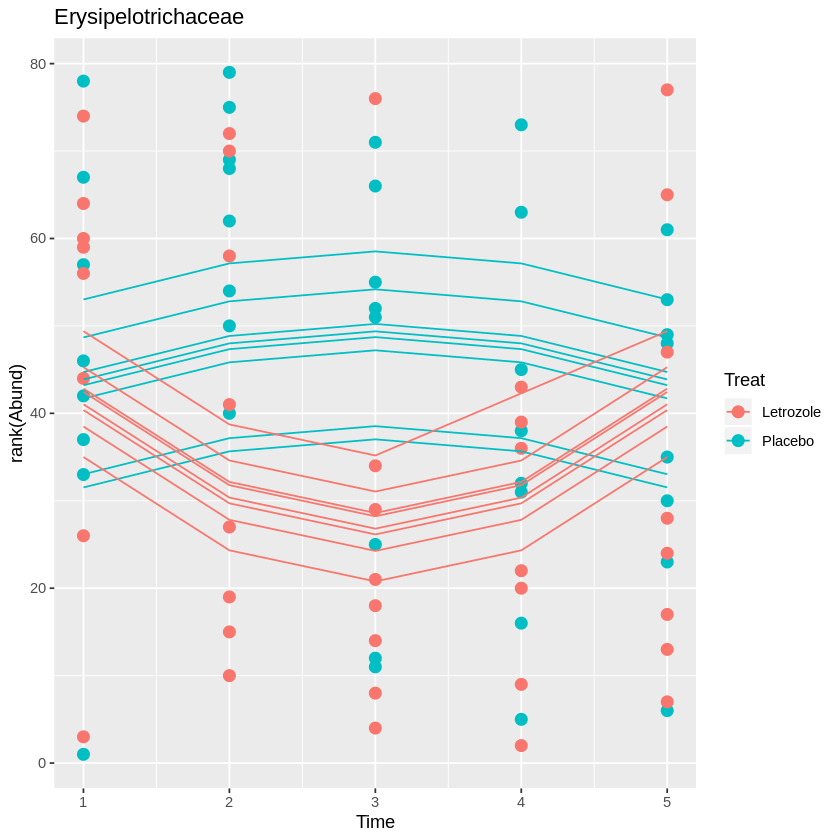

In [16]:
fm_ery <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Erysipelotrichaceae, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_ery))
    newdat <- expand.grid(Treat=unique(mylist$Erysipelotrichaceae),
                      Time=c(min(mylist$Erysipelotrichaceae$Time),
                            max(mylist$Erysipelotrichaceae$Time)))


    p_ery <- ggplot(mylist$Erysipelotrichaceae, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Erysipelotrichaceae") +
          geom_line(aes(y=predict(fm_ery), group=Individual))
    print(p_ery)

## Lachnospiraceae

Linear mixed-effects model fit by REML
 Data: mylist$Lachnospiraceae 
       AIC      BIC    logLik
  710.9096 729.4495 -347.4548

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             17.06539 (Intr)
1 | I((Time - 3)^2)TRUE 18.16593 -0.922
Residual                21.36859       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                                Value Std.Error DF   t-value p-value
(Intercept)                  46.96044  5.902643 61  7.955834  0.0000
I((Time - 3)^2)              -4.81988  2.029083 61 -2.375400  0.0207
TreatPlacebo                 -1.33187  8.291875 14 -0.160624  0.8747
I((Time - 3)^2):TreatPlacebo  3.29310  2.862536 61  1.150413  0.2545
 Correlation: 
                             (Intr) I((Tm-3)^2) TrtPlc
I((Time - 3)^2)              -0.697                   
TreatPlacebo                 -0.712  0.496            
I

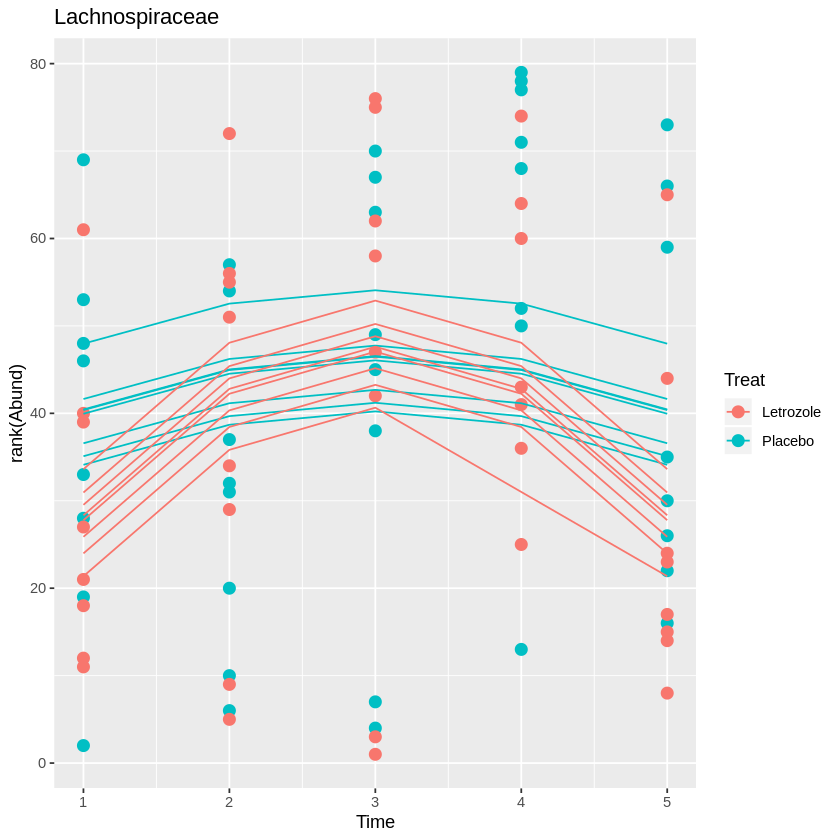

In [17]:
fm_lach <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Lachnospiraceae, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_lach))
    newdat <- expand.grid(Treat=unique(mylist$Lachnospiraceae),
                      Time=c(min(mylist$Lachnospiraceae$Time),
                            max(mylist$Lachnospiraceae$Time)))


    p_lach <- ggplot(mylist$Lachnospiraceae, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Lachnospiraceae") +
          geom_line(aes(y=predict(fm_lach), group=Individual))
    print(p_lach)

## Lactobacillus

Linear mixed-effects model fit by REML
 Data: mylist$Lactobacillus 
       AIC      BIC    logLik
  705.9993 724.5392 -344.9997

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev   Corr  
(Intercept)             16.41414 (Intr)
1 | I((Time - 3)^2)TRUE 17.52524 -0.923
Residual                20.69357       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                                 Value Std.Error DF   t-value p-value
(Intercept)                   57.08936  5.706211 61 10.004775  0.0000
I((Time - 3)^2)               -5.51862  1.964977 61 -2.808489  0.0067
TreatPlacebo                 -22.83222  8.015791 14 -2.848405  0.0129
I((Time - 3)^2):TreatPlacebo   5.59005  2.772105 61  2.016535  0.0482
 Correlation: 
                             (Intr) I((Tm-3)^2) TrtPlc
I((Time - 3)^2)              -0.698                   
TreatPlacebo                 -0.712  0.497           

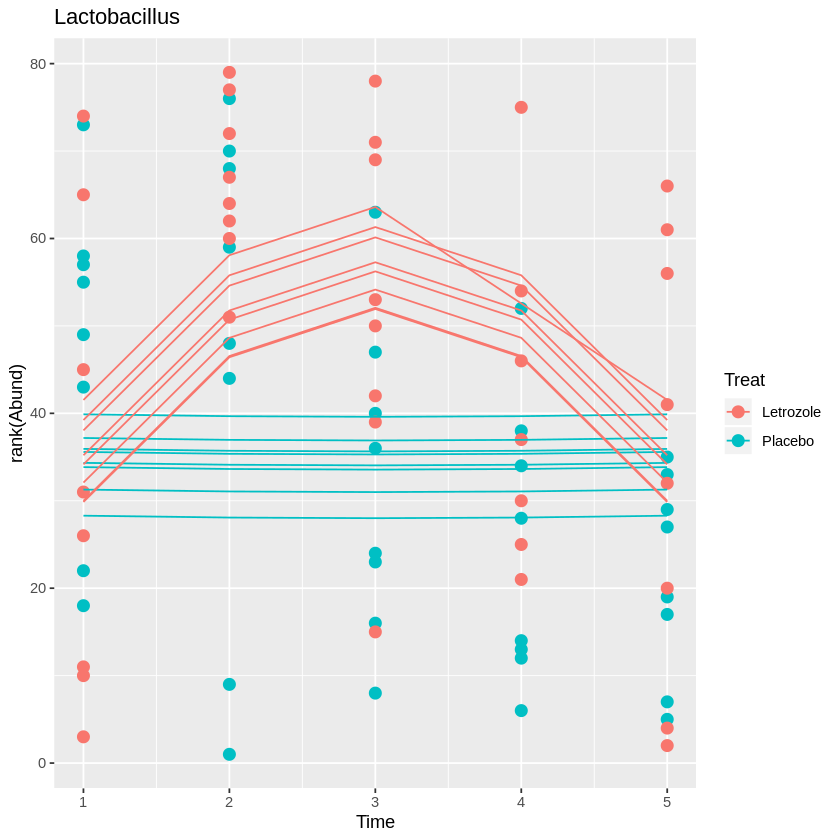

In [24]:
fm_lacto <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Lactobacillus, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_lacto))
    newdat <- expand.grid(Treat=unique(mylist$Lactobacillus),
                      Time=c(min(mylist$Lactobacillus$Time),
                            max(mylist$Lactobacillus$Time)))


    p_lacto <- ggplot(mylist$Lactobacillus, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Lactobacillus") +
          geom_line(aes(y=predict(fm_lacto), group=Individual))
    print(p_lacto)

## Oscillospira

Linear mixed-effects model fit by REML
 Data: mylist$Oscillospira 
       AIC      BIC    logLik
  714.3419 732.8818 -349.1709

Random effects:
 Formula: ~1 | I((Time - 3)^2) | Individual
 Structure: General positive-definite, Log-Cholesky parametrization
                        StdDev       Corr  
(Intercept)             4.010555e-03 (Intr)
1 | I((Time - 3)^2)TRUE 1.135949e-04 0     
Residual                2.275547e+01       

Fixed effects: rank(Abund) ~ I((Time - 3)^2) * Treat 
                                Value Std.Error DF   t-value p-value
(Intercept)                  49.25254  5.694124 61  8.649714  0.0000
I((Time - 3)^2)              -4.27657  2.160104 61 -1.979799  0.0522
TreatPlacebo                 -7.23826  7.991346 14 -0.905762  0.3804
I((Time - 3)^2):TreatPlacebo  2.98193  3.047846 61  0.978372  0.3318
 Correlation: 
                             (Intr) I((Tm-3)^2) TrtPlc
I((Time - 3)^2)              -0.768                   
TreatPlacebo                 -0.713  0.548 

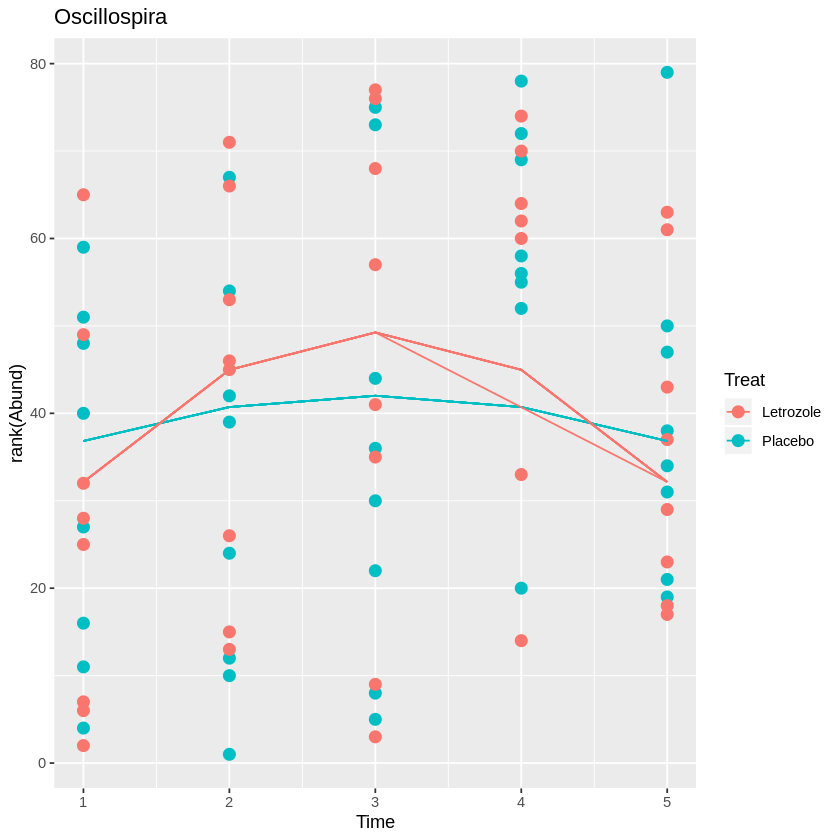

In [25]:
fm_osci <- lme(rank(Abund) ~ I((Time-3)^2) * Treat ,data = mylist$Oscillospira, random = ~ 1|I((Time-3)^2)|Individual)
    print(summary(fm_osci))
    newdat <- expand.grid(Treat=unique(mylist$Oscillospira),
                      Time=c(min(mylist$Oscillospira$Time),
                            max(mylist$Oscillospira$Time)))


    p_osci <- ggplot(mylist$Oscillospira, aes(x=Time, y=rank(Abund), colour=Treat)) +
          geom_point(size=3) + ggtitle("Oscillospira") +
          geom_line(aes(y=predict(fm_osci), group=Individual))
    print(p_osci)

In [ ]:
# Here is a plot of the bacteria that showed siginificance over time or treatment
pdf("LME_pedro_new.pdf",width = 15, height = 15)
grid.arrange(p_akker, p_allo, p_bifido,p_copro,p_rumino,p_s24, ncol = 2, nrow = 3)
dev.off()

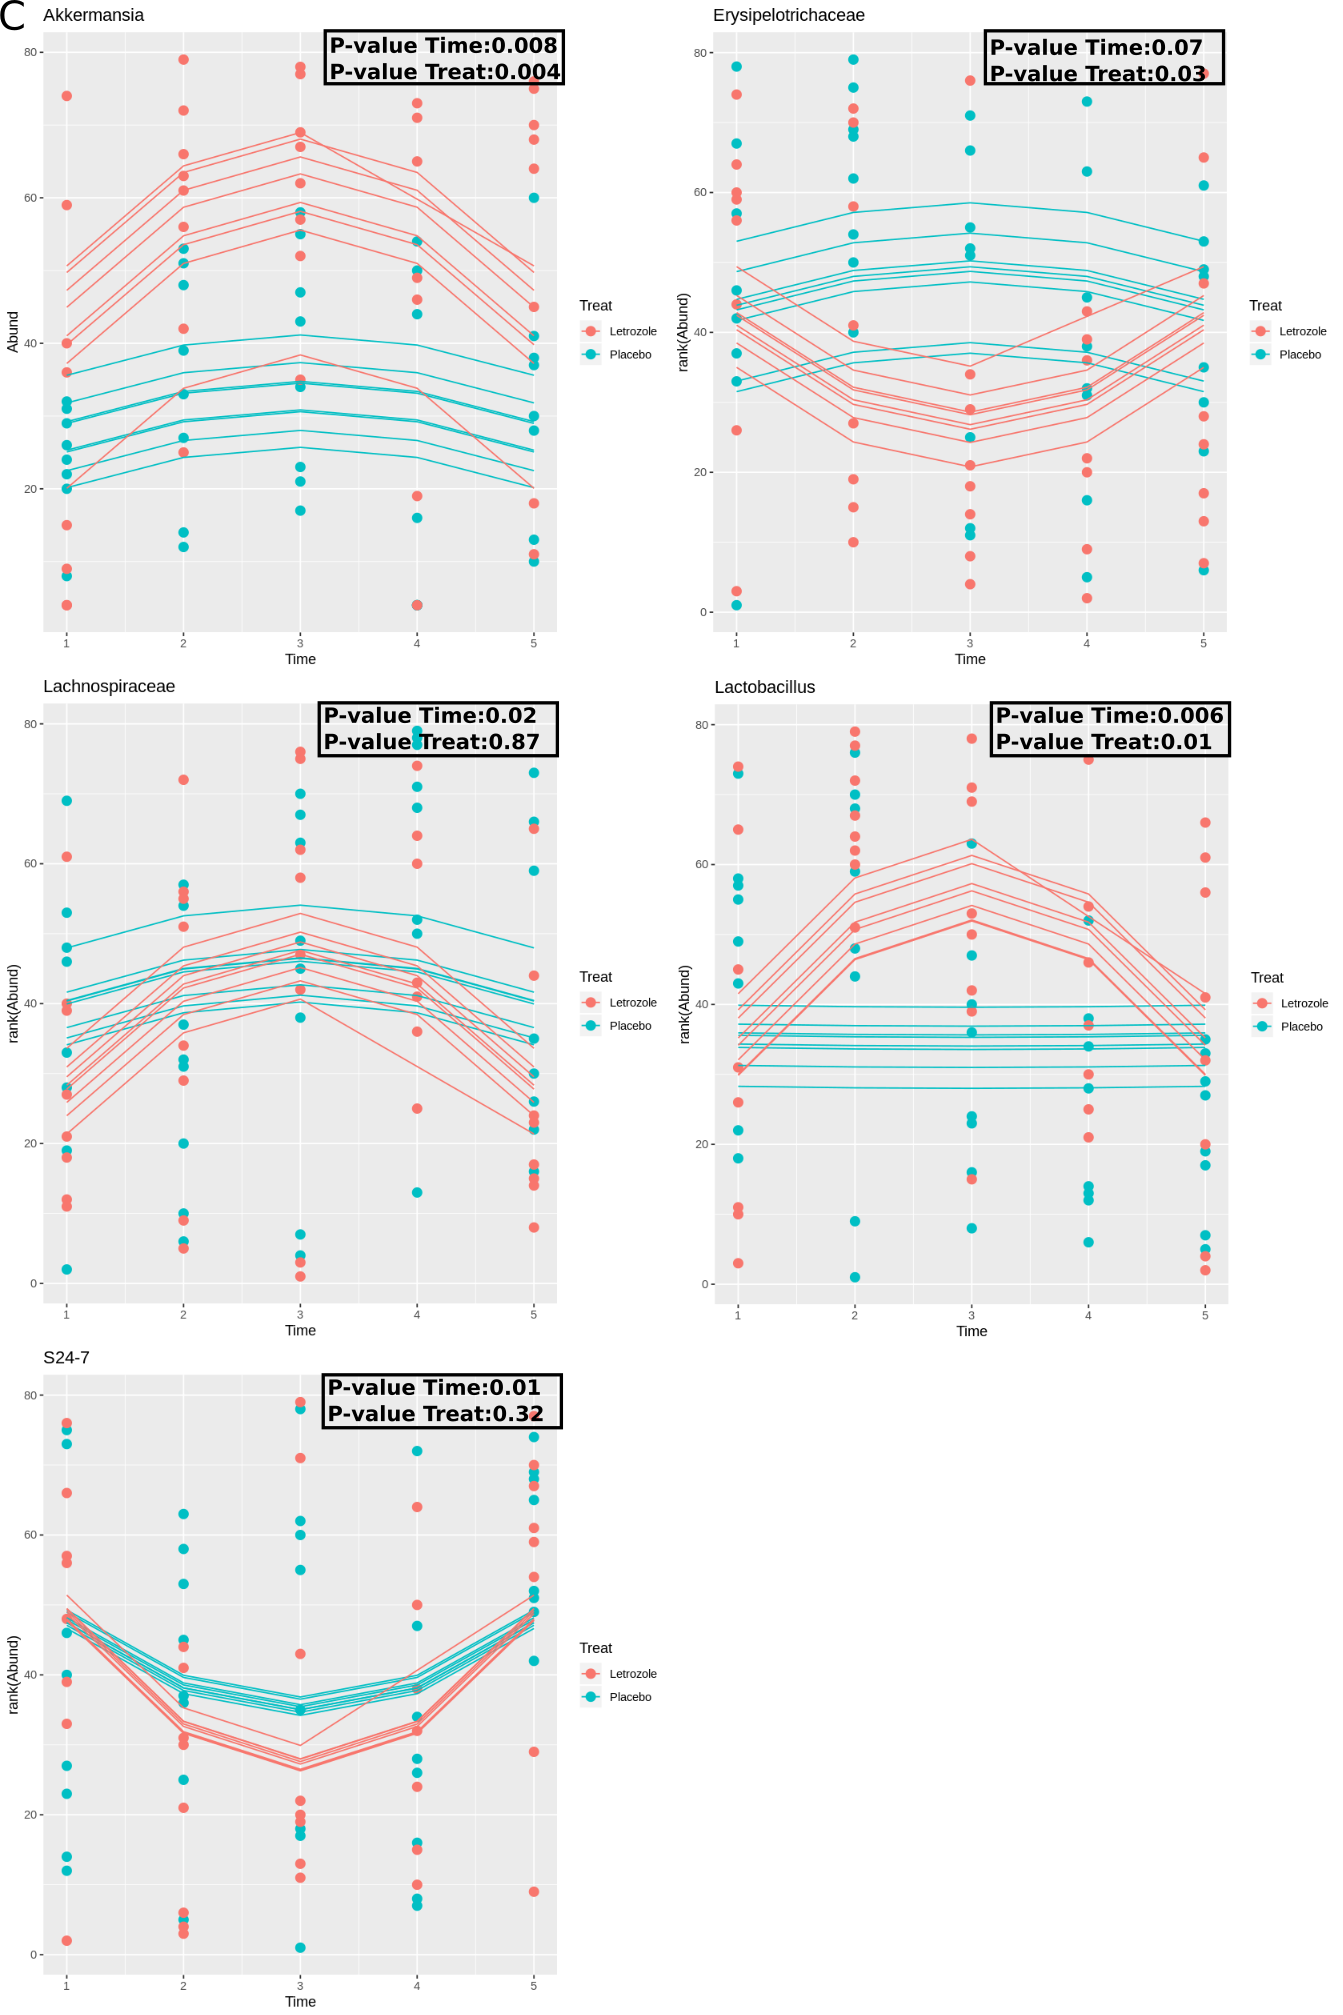